# 28. Вариационные автоэнкодеры (VAE). Что это такое?

In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

2024-11-15 22:25:54.432540: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-15 22:25:54.442855: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-15 22:25:54.445963: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#стандартизация данных
x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [5]:
input_img = Input((28, 28, 1))

x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(2, activation='linear')(x)

input_enc = Input(shape=(2,))
d = Dense(64, activation='relu')(input_enc)
d = Dense(28*28, activation='sigmoid')(d)
decoded = Reshape((28, 28, 1))(d)

encoder = keras.Model(input_img, encoded, name='encoder')
decoder = keras.Model(input_enc, decoded, name='decoder')
autoencoder = keras.Model(input_img, decoder(encoder(input_img)), name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [6]:
batch_size = 64

autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=batch_size,
                shuffle=True)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0758
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0502
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0471
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0456
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0445
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0436
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0431
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0426
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0421
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0418
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0414
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0411
Epoch 13/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0410
Epoch 14/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0407
Epoch 15/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - lo

In [7]:
h = encoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step


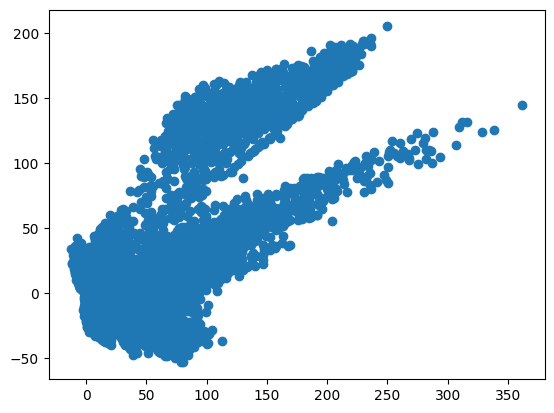

In [8]:
a = plt.scatter(h[:, 0], h[:, 1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


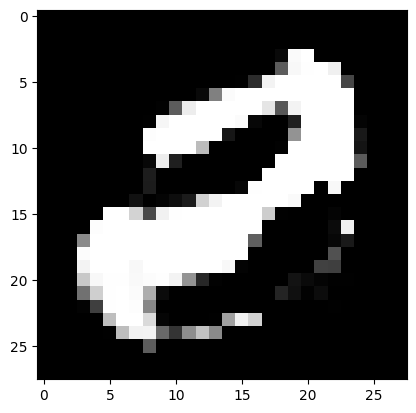

In [17]:
img = decoder.predict(np.expand_dims([0, 150], axis=0))
plt.imshow(img.squeeze(), cmap='gray')